<a href="https://colab.research.google.com/github/PrinceRaj1161/Machine-learning/blob/main/K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Select the features to cluster

In [7]:
X= df.iloc[:,3:].values

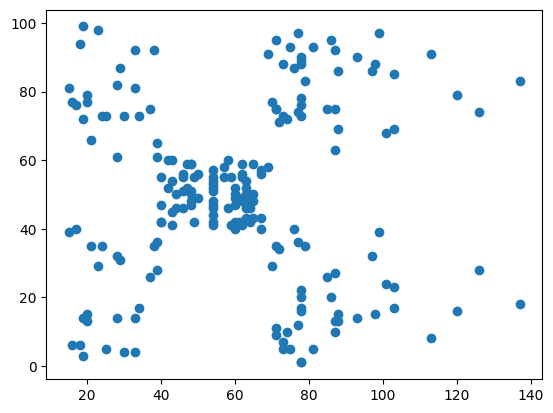

In [8]:
plt.scatter(X[:,0],X[:,1])

## Finding optimal number of clusters -- elbow method

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++",random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

## Plot the elbow curve

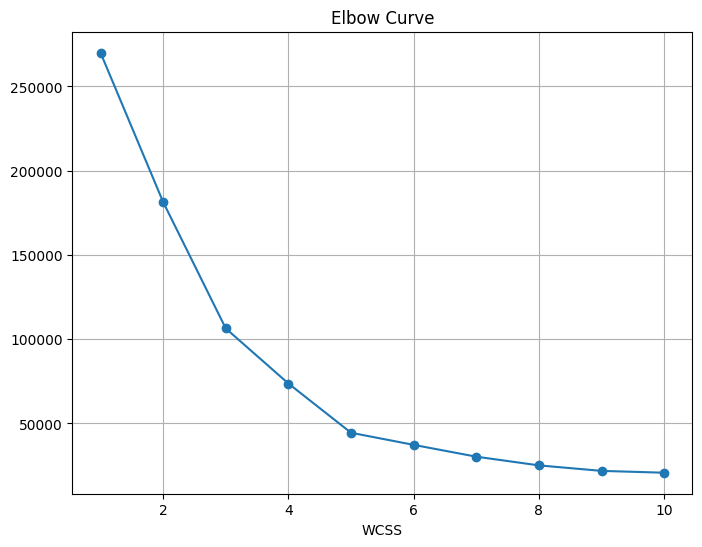

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o")
plt.title('Elbow Curve')
plt.xlabel("Number of clusters K")
plt.xlabel("WCSS")
plt.grid()
plt.show()

In [15]:
# From above we can say K=5

## Train the model on the dataset using the optimal cluster K value

In [18]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)
# y_means have name of the cluser
y_means = kmeans.fit_predict(X)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [19]:
# From the output we can say we have 5 different clusers: -
# 0,1,2,3,4

## Visualization of the clusers

In [20]:
X[y_means==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137])

In [21]:
X[y_means==3,1]

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65])

In [22]:
# First one check the cluster name, After , we check the columns
# of the X. X[1] is Spending score
# While X[0] is Annual income

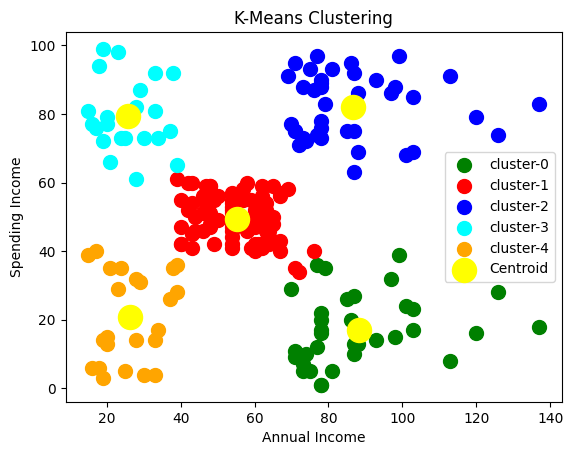

In [23]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color="green",s=100,label="cluster-0")
plt.scatter(X[y_means==1,0],X[y_means==1,1],color="red",s=100,label="cluster-1")
plt.scatter(X[y_means==2,0],X[y_means==2,1],color="blue",s=100,label="cluster-2")
plt.scatter(X[y_means==3,0],X[y_means==3,1],color="cyan",s=100,label="cluster-3")
plt.scatter(X[y_means==4,0],X[y_means==4,1],color="orange",s=100,label="cluster-4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",s=300,label="Centroid")
plt.title("K-Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Income")
plt.legend()